In [16]:
import dotdot
from neuromodel import Model, Offers, run_model, Graph
import neuromodel.graphs

%matplotlib notebook

In [22]:
ΔA, ΔB, n = 20, 20, 1500

preference = 'GABA'# choose where to instore preference among AMPA, GABA or NMDA

δ_J_stim = (1, 1)
δ_J_gaba = (1, 1, 1)
δ_J_nmda = (1, 1)
if preference == 'AMPA':
    δ_J_stim = (2, 1)
elif preference == 'GABA':
    δ_J_gaba = (1, 1.02, 1)
elif preference == 'NMDA':
    δ_J_nmda = (1.05, 1)
else :
    raise ValueError('choose a preference')
    
offers = Offers(ΔA=ΔA, ΔB=ΔB, n=n, random_seed=1)

x_offers = ((1, 0), (20, 1), (16, 1), (12, 1), (8, 1), (4, 1), # specific offers for Figures 4C, 4G, 4K
            (1, 4), (1, 8), (1, 12), (1, 16), (1, 20), (0, 1))

In [23]:
def compute_fig4_data():
    model = Model(n=n, ΔA=ΔA, ΔB=ΔB, random_seed=0,
                  range_A=offers.range_A, range_B=offers.range_B,
                  δ_J_stim=δ_J_stim, δ_J_gaba=δ_J_gaba, δ_J_nmda=δ_J_nmda)

    filename='data/fig5[{}]_{}.pickle'.format(n, preference)
    return run_model(model, offers, history_keys=('r_ovb', 'r_2', 'r_I'), filename=filename)

In [24]:
analysis = compute_fig4_data()
graph = Graph(analysis)

step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500


<IPython.core.display.Javascript object>


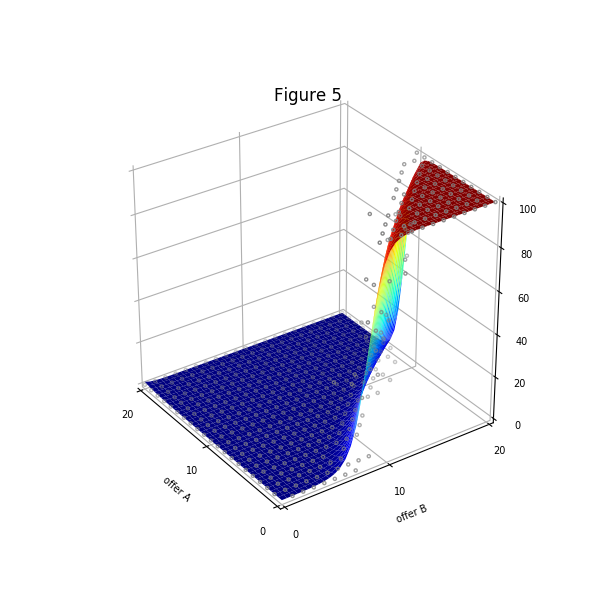

In [25]:
neuromodel.graphs.regression(analysis.data_regression(dim= '3D'), title ='Figure 5')

In [26]:
data_5B = analysis.data_regression(dim= '2D')
Figure_5B = graph.regression_2D(data_5B, title='Figure_5B')